<a href="https://colab.research.google.com/github/nurkomarhidaya/Proa-ML/blob/main/RPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import copy, cv2,glob, shutil

In [2]:
import os
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import zipfile

In [3]:
class mC(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.96):
            self.model.stop_training = True
callbacks = mC()

In [4]:
from google.colab import drive

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip

--2022-07-29 16:50:12--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 108.177.98.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   313MB/s    in 0.6s    

2022-07-29 16:50:13 (313 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]



In [5]:
lz = "/tmp/rps.zip"
zip_ref = zipfile.ZipFile(lz, 'r')
zip_ref.extractall('/tmp/data')
zip_ref.close()

In [7]:
base_dir = '/tmp/rps'
data_dir = '/tmp/data/rps'
t_dir = os.path.join(base_dir,'train')
val_dir = os.path.join(base_dir,'val')
roc_dir = os.path.join(data_dir,'rock')
pa_dir = os.path.join(data_dir,'paper')
sci_dir = os.path.join(data_dir,'scissors')

In [ ]:
os.mkdir(base_dir)
os.mkdir(t_dir)
os.mkdir(val_dir)

In [ ]:
tr = os.path.join(t_dir, 'rock')
tp = os.path.join(t_dir, 'paper')
ts = os.path.join(t_dir, 'scissors')
vr = os.path.join(val_dir, 'rock')
vp = os.path.join(val_dir, 'paper')
vs = os.path.join(val_dir, 'scissors')

In [ ]:
os.mkdir(tr)
os.mkdir(tp)
os.mkdir(ts)
os.mkdir(vr)
os.mkdir(vp)
os.mkdir(vs)

In [ ]:
train_sci_dir, val_sci_dir = train_test_split(os.listdir(sci_dir), test_size = 0.40)
train_roc_dir, val_roc_dir = train_test_split(os.listdir(roc_dir), test_size = 0.40)
train_pa_dir, val_pa_dir = train_test_split(os.listdir(pa_dir), test_size = 0.40)

In [ ]:
for file in train_roc_dir:
    shutil.copy(os.path.join(roc_dir, file), os.path.join(tr, file))
for file in val_roc_dir:
    shutil.copy(os.path.join(roc_dir, file), os.path.join(vr,file))
for file in train_pa_dir:
    shutil.copy(os.path.join(pa_dir,file), os.path.join(tp,file))
for file in val_pa_dir:
    shutil.copy(os.path.join(pa_dir,file), os.path.join(vp,file))

for file in train_sci_dir:
    shutil.copy(os.path.join(sci_dir,file), os.path.join(ts,file))
for file in val_sci_dir:
    shutil.copy(os.path.join(sci_dir,file), os.path.join(vs,file))

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.35,
    fill_mode = 'nearest',
)

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.35,
    fill_mode = 'nearest'
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    t_dir,
    target_size=(150,150),
    batch_size= 32,
    class_mode='categorical'
)

val_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1512 images belonging to 3 classes.
Found 1008 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       36992     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 41, 
    epochs = 30,
    validation_data = val_generator,
    validation_steps = 27, 
    verbose=1,
    callbacks=[callbacks]
)

Epoch 1/30
41/41 [==============================] - 28s 404ms/step - loss: 1.1205 - accuracy: 0.4627 - val_loss: 1.3939 - val_accuracy: 0.5046
Epoch 2/30
41/41 [==============================] - 16s 392ms/step - loss: 0.4251 - accuracy: 0.8323 - val_loss: 2.9080 - val_accuracy: 0.6377
Epoch 3/30
41/41 [==============================] - 16s 390ms/step - loss: 0.1348 - accuracy: 0.9657 - val_loss: 3.7510 - val_accuracy: 0.6308


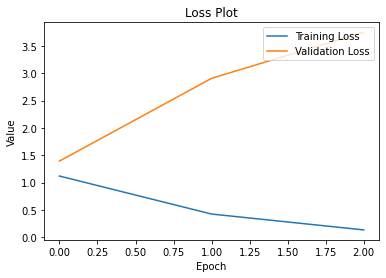

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

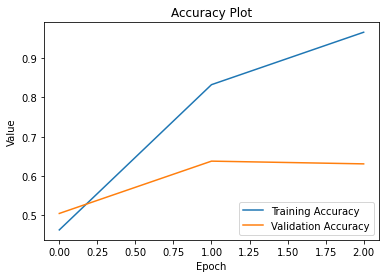

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')